In [1]:
import datasets

In [2]:
dataset  = datasets.load_dataset('hyperpartisan_news_detection', 'bypublisher')

Downloading:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/981M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset hyperpartisan_news_detection downloaded and prepared to C:\Users\danie\.cache\huggingface\datasets\hyperpartisan_news_detection\bypublisher\1.0.0\7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
from transformers import LongformerForSequenceClassification, LongformerTokenizer, DataCollatorWithPadding

tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")
model = LongformerForSequenceClassification.from_pretrained("allenai/longformer-base-4096")

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570M [00:00<?, ?B/s]

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weig

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'title', 'hyperpartisan', 'url', 'published_at', 'bias'],
        num_rows: 600000
    })
    validation: Dataset({
        features: ['text', 'title', 'hyperpartisan', 'url', 'published_at', 'bias'],
        num_rows: 600000
    })
})


In [10]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['text', 'title', 'hyperpartisan', 'url', 'published_at', 'bias'],
    num_rows: 600000
})

In [11]:
import pandas as pd

dataset.set_format(type="pandas")
df = dataset["train"][:]
df.head()

,text,title,hyperpartisan,url,published_at,bias
0,<p>When explaining her decision to reevaluate ...,After DeVos Announced Plans To Reexamine Title...,True,https://dailywire.com/news/20858/after-devos-a...,2017-09-10,0
1,<p>A Florida university will honor Trayvon Mar...,University To Award Trayvon Martin With Posthu...,True,https://dailywire.com/news/16103/university-aw...,2017-05-05,0
2,<p>Nov. 15 (UPI) &#8212; Texas State Universit...,Texas State University suspends Greek life aft...,False,https://newsline.com/texas-state-university-su...,2017-11-15,1
3,<p>Against the backdrop of an increasingly pol...,Jewish Organization's Huge Day Of Unity On Tue...,True,https://dailywire.com/node/9485,2016-09-26,0
4,<p>President-elect Donald Trump has reached an...,"BREAKING: Trump Reaches Agreement To Keep 1,00...",True,https://dailywire.com/news/11184/breaking-trum...,2016-11-29,0


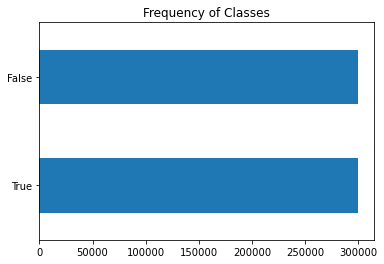

True     300000
False    300000
Name: hyperpartisan, dtype: int64


In [15]:
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

import matplotlib.pyplot as plt

df["hyperpartisan"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()
print(df["hyperpartisan"].value_counts(ascending=True))

In [16]:
dataset.reset_format()